# Video games sales analysis from 1986 to 2016

## Introduction

Metacritic, is a website that collect reviews of movies, songs and video games. By scrapping this website the creator of this dataset was able to get interesting data on the video games industry between 1986 and 2016. This dataset can be divided in three categories of data :
    -1) The information on the game: Name, Year of release, Publisher or even Genre;
    -2) The number of million units sold (per region): North America, Europe, Japan, Other and Global;
    -3) Finally, the critics: divided between user critics and a critic score determined by averaging the critics of a number of different profesional critics.
    
For the purpose of this analysis, the critic aspect will be ignore to focus more on the sales. The following question will be answered: What are the most successful games ? Which region is leading the global sales trend ? What is the most successful editor ? And finally for which platform sold more games ?

This is a first try at doing an analysis of this type using Jupyter Notebook and Python. A particular focus will be adress to the following learning points:
    - Data manipulation with pandas;
    - Data visualization with seaborn and matplotlib;

## Data management

First, the environment of the analysis needs to be setup. Namely, importing the required library, importing and cleaning the data.

In [1]:
#Installing the libraries

!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import the data as a dataframe from a .csv file using pandas

data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Clear Data for sales analysis

In [4]:
#Remove ratings column as we don't want to do any analysis with them
col_remove = ['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating']
data_clear = data.drop(labels=col_remove, axis=1)
data_clear.info()

#Remove N/A
data_clear.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

From the .isnull() method ran above, it appears that some of rows are missing information, mainly related to the year of release. This parameter will be of interest later in the analysis. The decision was then made to delete the rows with missing values from the dataset.

In [5]:
data_clear=data_clear.dropna(axis=0)
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


The .info() method ran on the cleared dataset, shows that all the numeric column of interest are as type float64 already. The other column that are as type object are actually strings. No need to convert any data to a new type.

## What are the 10 top selling games accross the world ?

With the data cleaned, it is now time to get into the analysis part of this notebook. The first question that this analysis is proposing to answer is what are the most succesful games of all time in terms of sales.
The sales for each are divided in four regions: North America, Europe, Japan and Other. The sum of the sales done in the four regions is logged in the "Global_Sales" column.
Let's first take a look at the later.


In [6]:
data_clear.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Sorting the data to get a feeling of the top 10 best selling games

In [7]:
data_sales_sort = data_clear.sort_values(by=['Global_Sales'], ascending=False)
data_sales_sort.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


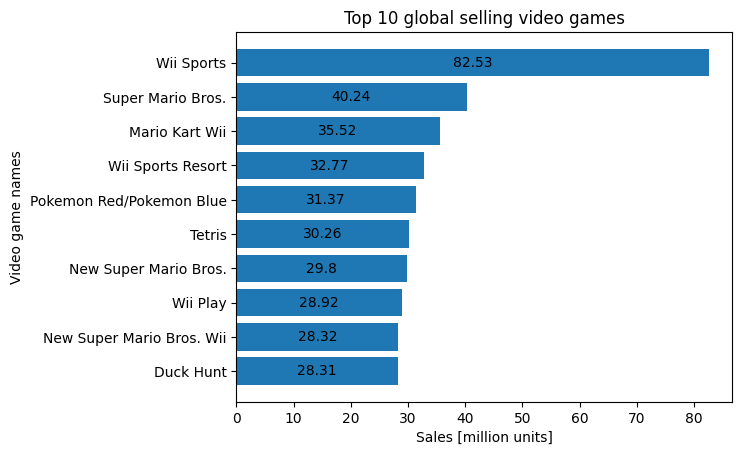

In [8]:
#Ten best games
data_sales_sort_hd = data_sales_sort.head(10).sort_values(by=['Global_Sales'], ascending = True)
top10_games_gs = data_sales_sort_hd['Name'].head(10)
top10_sales_gs = data_sales_sort_hd['Global_Sales'].head(10)

fig, ax = plt.subplots()
p1 = ax.barh(top10_games_gs, top10_sales_gs)
ax.set_title('Top 10 global selling video games')
ax.set_xlabel('Sales [million units]')
ax.set_ylabel('Video game names')
ax.bar_label(p1, label_type='center')

plt.show()

It appears that up until 2016 Wii Sports is the best selling games globally with more than 80 millions units sold, which is more than two times more sales than the second on this top "Super Mario Bros".

Note that in this top 10 all games are edited by Nintendo, except the number 10, "Duck Hunt".

Wii Sports can almost be considered as an outlier here. Indeed, the top 2 to top 10 is pretty stacked going from 40 millions units sold to 28.3 million units, which is a variation of 12 million units. While between the top 1 and the top 2, there is a difference of more than 40 millions units. This can maybe be explained by the way Wii Sports was marketed. Indeed, the game was sold along with the Wii. Meaning, that most people around the world that bought the console, ended up with their copy of Wii Sports.

But is Wii Sports the best selling game for each region of the world ?

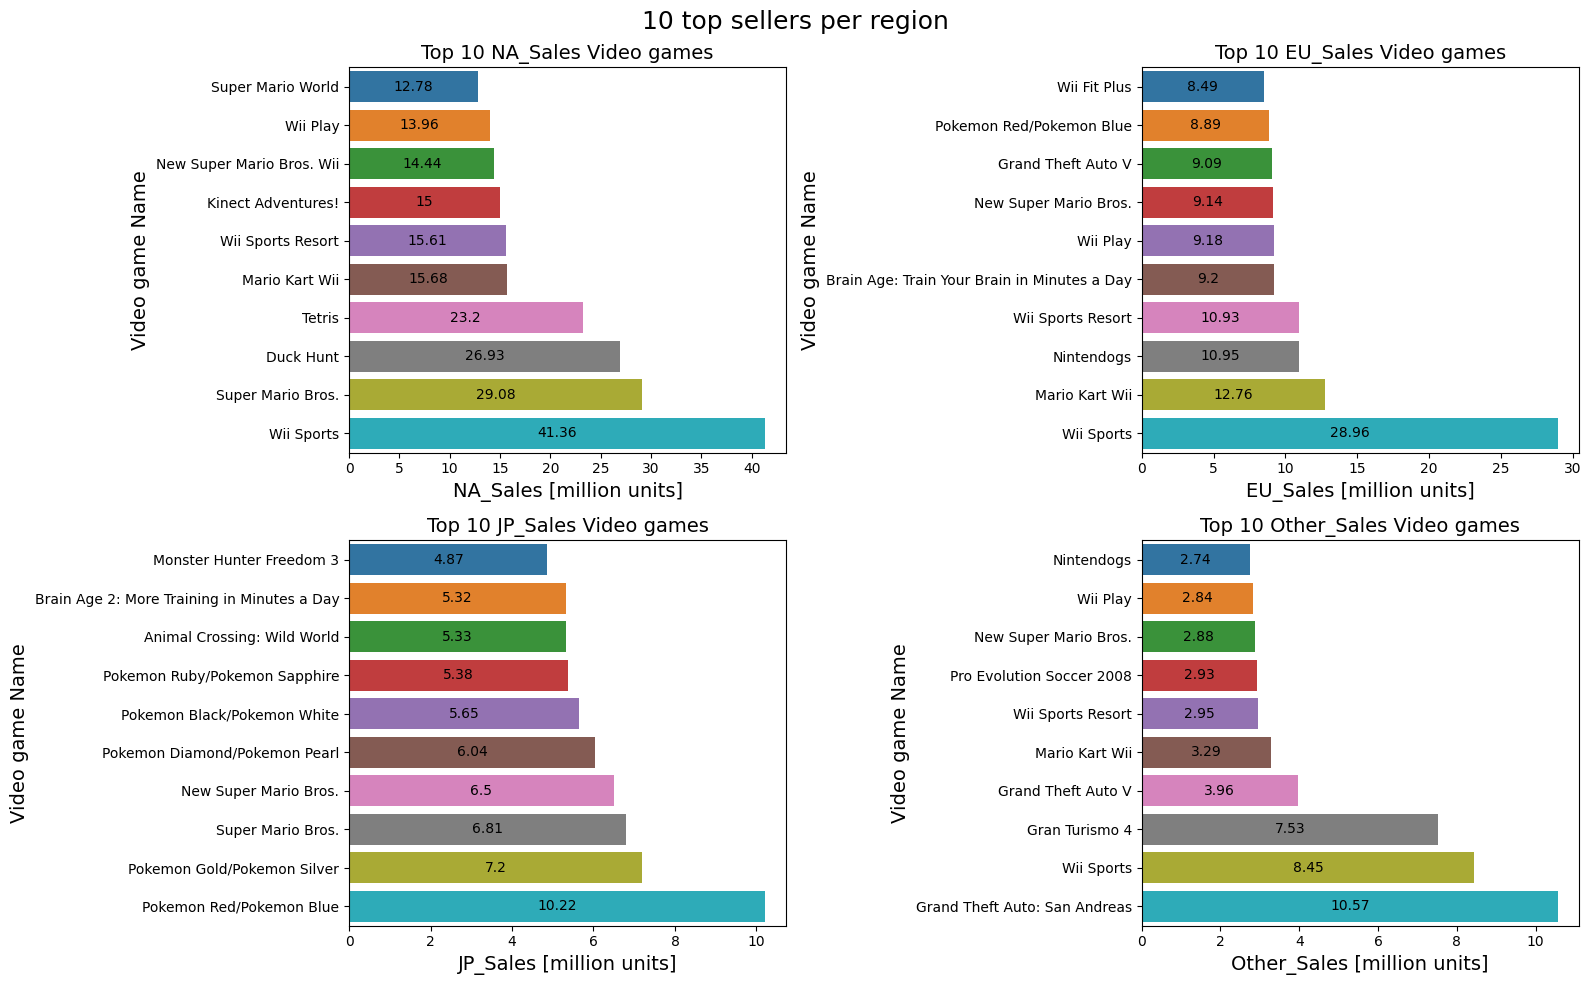

In [9]:
sales_regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
fig,axes = plt.subplots(int(len(sales_regions)/2),int(len(sales_regions)/2), figsize=(16,10))
axes = axes.ravel() #Required for array typing ???
for index, region in enumerate(sales_regions):
    data_sales_sort = data_clear.sort_values(by=region, ascending=True)
    sns.barplot(x=data_sales_sort[region].tail(10),y=data_sales_sort['Name'].tail(10), ax=axes[index])
    axes[index].set_title(f'Top 10 {region} Video games', fontsize = 14)
    axes[index].set_xlabel(f'{region} [million units]', fontsize = 14)
    axes[index].set_ylabel('Video game Name', fontsize = 14)
    axes[index].bar_label(axes[index].containers[0], label_type='center')
    
plt.suptitle('10 top sellers per region', fontsize = 18)
plt.tight_layout()
plt.show()

In North America, Wii sports is the best selling games with around half of the global sales. Though, compared to europe and it's 29 million sales, it's not that much more than the second best selling game "Super Mario Bros" and it's 29 millions sales. Indeed, in Europe, Wii Sports sold more than 100% more units than the second, "Mario Kart Wii".

An interesting observation is that even though Wii Sports is edited by Nintendo, a Japanese company, it doesn't hold the first place in our top in Japan. It is not even in the top 10 ! This can be explained by the fact that, as explained above, the game was sold along in the Wii in Europe and North America, but not in Japan. 

Those four plots also keep showcasing the domination of Nintendo with 8 Nintendo games in the North American top 10, 8 in the European top 10, 10 in the Japanese top 10 and 6 in the rest of the world top 10.


## Correlation between Global sales and regional sales

As explained below, more than half the units of Wii Sports were sold in North America, while it doesn't even make it to the top 10 in Japan. It brings the question: what is the correlation between global sales and regional sales.

In [10]:
#Create the correlation matrix
corr_m = data_clear.corr()
corr_m.head(6)



,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.092346,0.003922,-0.168614,0.037686,-0.076337
NA_Sales,-0.092346,1.000000,0.766539,0.451175,0.638502,0.941238
EU_Sales,0.003922,0.766539,1.000000,0.435877,0.722679,0.901665
JP_Sales,-0.168614,0.451175,0.435877,1.000000,0.291489,0.613305
Other_Sales,0.037686,0.638502,0.722679,0.291489,1.000000,0.748907
Global_Sales,-0.076337,0.941238,0.901665,0.613305,0.748907,1.000000


In [11]:
#Drop year of release
corr_m = corr_m.drop(['Year_of_Release'], axis=1)
corr_m.head(6)

corr_m = corr_m.drop(corr_m.index[0], axis=0)
corr_m.head(6)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.766539,0.451175,0.638502,0.941238
EU_Sales,0.766539,1.000000,0.435877,0.722679,0.901665
JP_Sales,0.451175,0.435877,1.000000,0.291489,0.613305
Other_Sales,0.638502,0.722679,0.291489,1.000000,0.748907
Global_Sales,0.941238,0.901665,0.613305,0.748907,1.000000


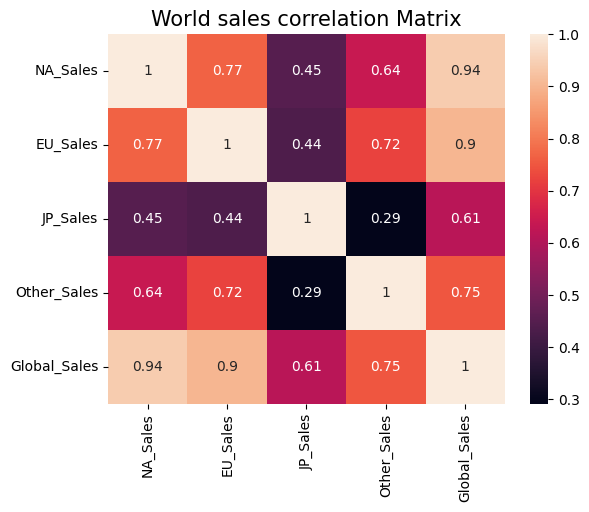

In [12]:
fig,ax = plt.subplots()
sns.heatmap(corr_m, annot=True, ax = ax)
ax.set_title('World sales correlation Matrix', fontsize=15)
plt.show()

It appears that the global sales are driven mainly by North American and European sales with correlation factors above 0.9. This can be explained by the population amount of those regions (respectively 579 millions and 510 millions in 2016) compared to the population of Japan (127 millions in 2016). 
A decent correlation exists between the global sales and the other sales. The Other_Sales category is suppose to be the sales in the rest of the world which would make it more that 5.5 billion people. The fact that it doesn't weigh as much in the balance is probably related to the fact that outside of North America, Europe and Japan, average wage is lower, maybe not allowing people to afford video games.

Another interesting observation is that the sales in Europe, North America and Others have some average high correlation. Which means that people probably like the same kind of games in those regions. While, the correlations of the regional sales with the Japanes sales are more on the low side. Namely, people in Japan have different taste in video games than the rest of the world.

## What are the best editors ?

As discussed above, the Top 10 of region seems dominated by Nintendo. This next section will attempt to comfirm that feeling.

In [13]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
#Calculate the sales per publisher per region
publishers_df = pd.DataFrame()
sales_regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']

for region in sales_regions:
    sales_pub = data_clear.groupby('Publisher')[region].sum()
    publishers_df[region]=sales_pub    
    
publishers=data_clear['Publisher'].unique()
publishers_df['Publisher'] = np.sort(publishers)

publishers_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher
Publisher,,,,,,
10TACLE Studios,0.07,0.04,0.0,0.00,0.11,10TACLE Studios
1C Company,0.01,0.07,0.0,0.01,0.10,1C Company
20th Century Fox Video Games,1.82,0.10,0.0,0.01,1.94,20th Century Fox Video Games
2D Boy,0.00,0.03,0.0,0.01,0.04,2D Boy
3DO,6.48,3.04,0.0,0.63,10.12,3DO


With the method .groupby(), the sales per region and per publisher are calculated. Then it is required to sort the data in order to plot the top 10 best selling publishers per region.

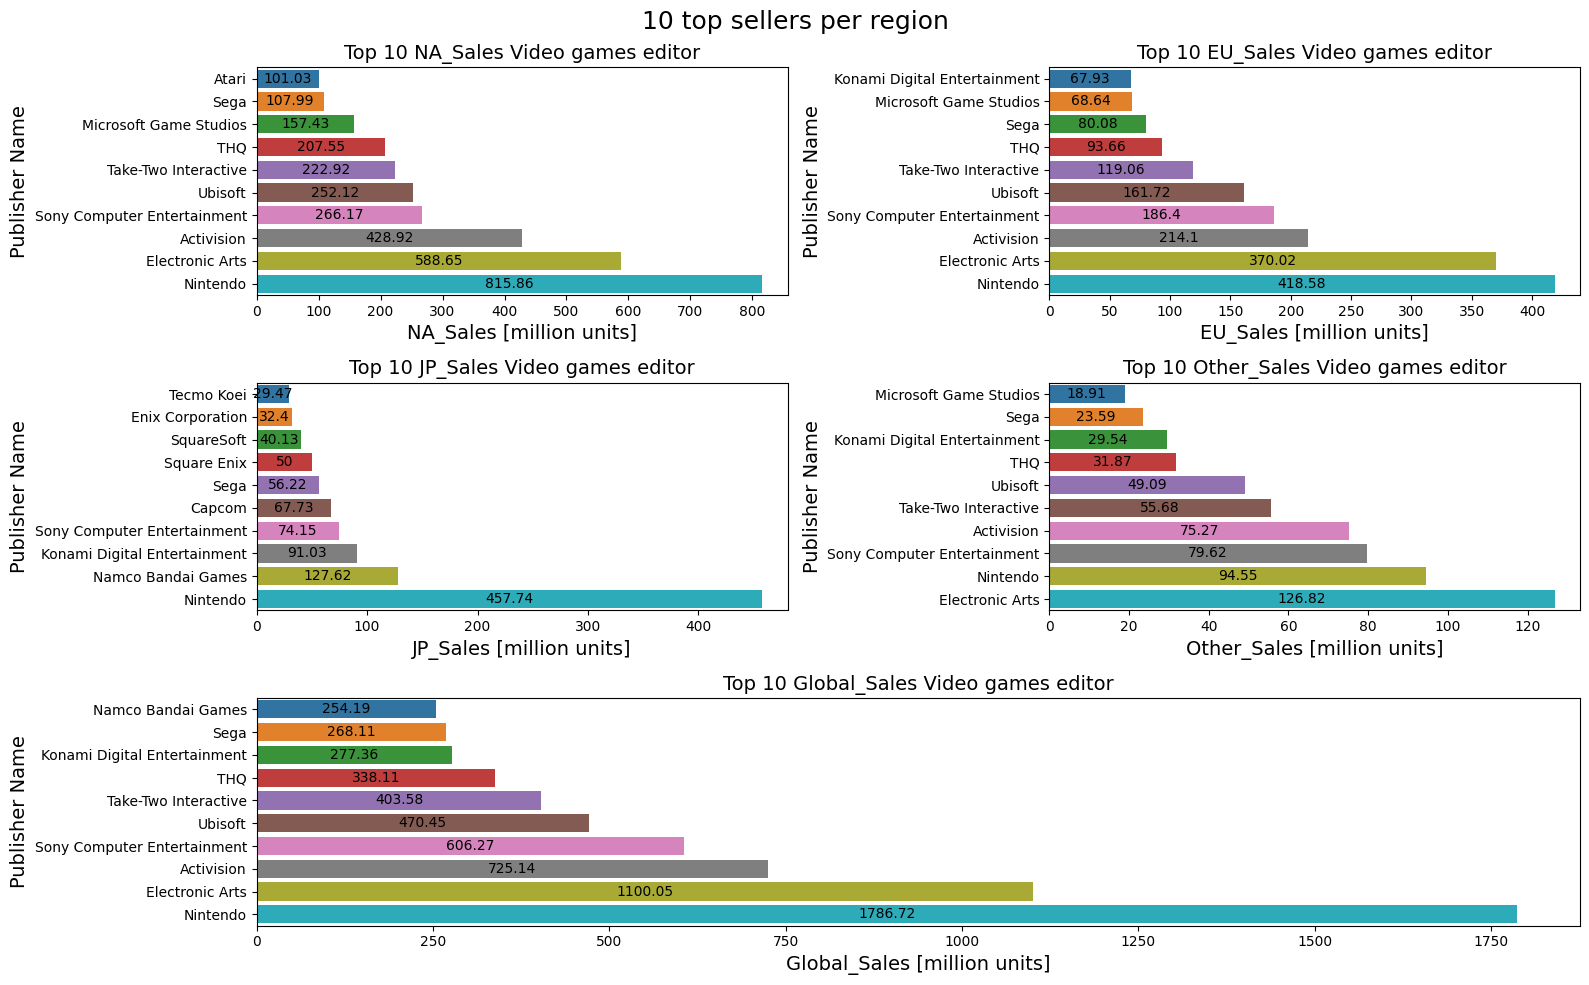

In [20]:
fig = plt.figure(figsize=(16,10))
axes=[None]*5
axes[0] = plt.subplot2grid(shape=(3,2), loc=(0,0), colspan=1)    
axes[1] = plt.subplot2grid(shape=(3,2), loc=(0,1), colspan=1)
axes[2] = plt.subplot2grid(shape=(3,2), loc=(1,0), colspan=1)
axes[3] = plt.subplot2grid(shape=(3,2), loc=(1,1), colspan=1)
axes[4] = plt.subplot2grid(shape=(3,2), loc=(2,0), colspan=2)

# axes = axes.ravel() #Required for array typing ???

for index, region in enumerate(sales_regions):
    data_sales_sort = publishers_df.sort_values(by=region, ascending=True)
    sns.barplot(x=data_sales_sort[region].tail(10),y=data_sales_sort['Publisher'].tail(10), ax=axes[index])
    axes[index].set_title(f'Top 10 {region} Video games editor', fontsize = 14)
    axes[index].set_xlabel(f'{region} [million units]', fontsize = 14)
    axes[index].set_ylabel('Publisher Name', fontsize = 14)
    axes[index].bar_label(axes[index].containers[0], label_type='center', fontsize = 10)

plt.suptitle('10 top sellers per region', fontsize = 18)
plt.tight_layout()
plt.show()



As expected, Nintendo is dominating all over the world. To be more precise it dominating in the three main regions of this dataset, but not in the rest of the world where Electronic Arts, the editor of the soccer game Fifa, is holding the first place of the top.

The domination of Nintendo is enormous especially in Japan, where the sales done by Nintendo alone are higher than the combined sales of the rest of the top 6. 
Even though Japan has a fifth of the European population, Nintendo is selling more games in Japan than in Europe.

Once again, those plot shows that is is really hard to get Japanese market for foreign companies as the top 10 selling companies in Japan are Japanese.

Let's see what is the market share held by Nintendo.

In [21]:
for region in sales_regions:
    publishers_df[region]=(100*publishers_df[region]/data_clear[region].sum()).round(1)

publishers_df.head(10)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher
Publisher,,,,,,
10TACLE Studios,0.0,0.0,0.0,0.0,0.0,10TACLE Studios
1C Company,0.0,0.0,0.0,0.0,0.0,1C Company
20th Century Fox Video Games,0.0,0.0,0.0,0.0,0.0,20th Century Fox Video Games
2D Boy,0.0,0.0,0.0,0.0,0.0,2D Boy
3DO,0.1,0.1,0.0,0.1,0.1,3DO
49Games,0.0,0.0,0.0,0.0,0.0,49Games
505 Games,0.7,0.7,0.2,0.7,0.6,505 Games
5pb,0.0,0.0,0.1,0.0,0.0,5pb
7G//AMES,0.0,0.0,0.0,0.0,0.0,7G//AMES


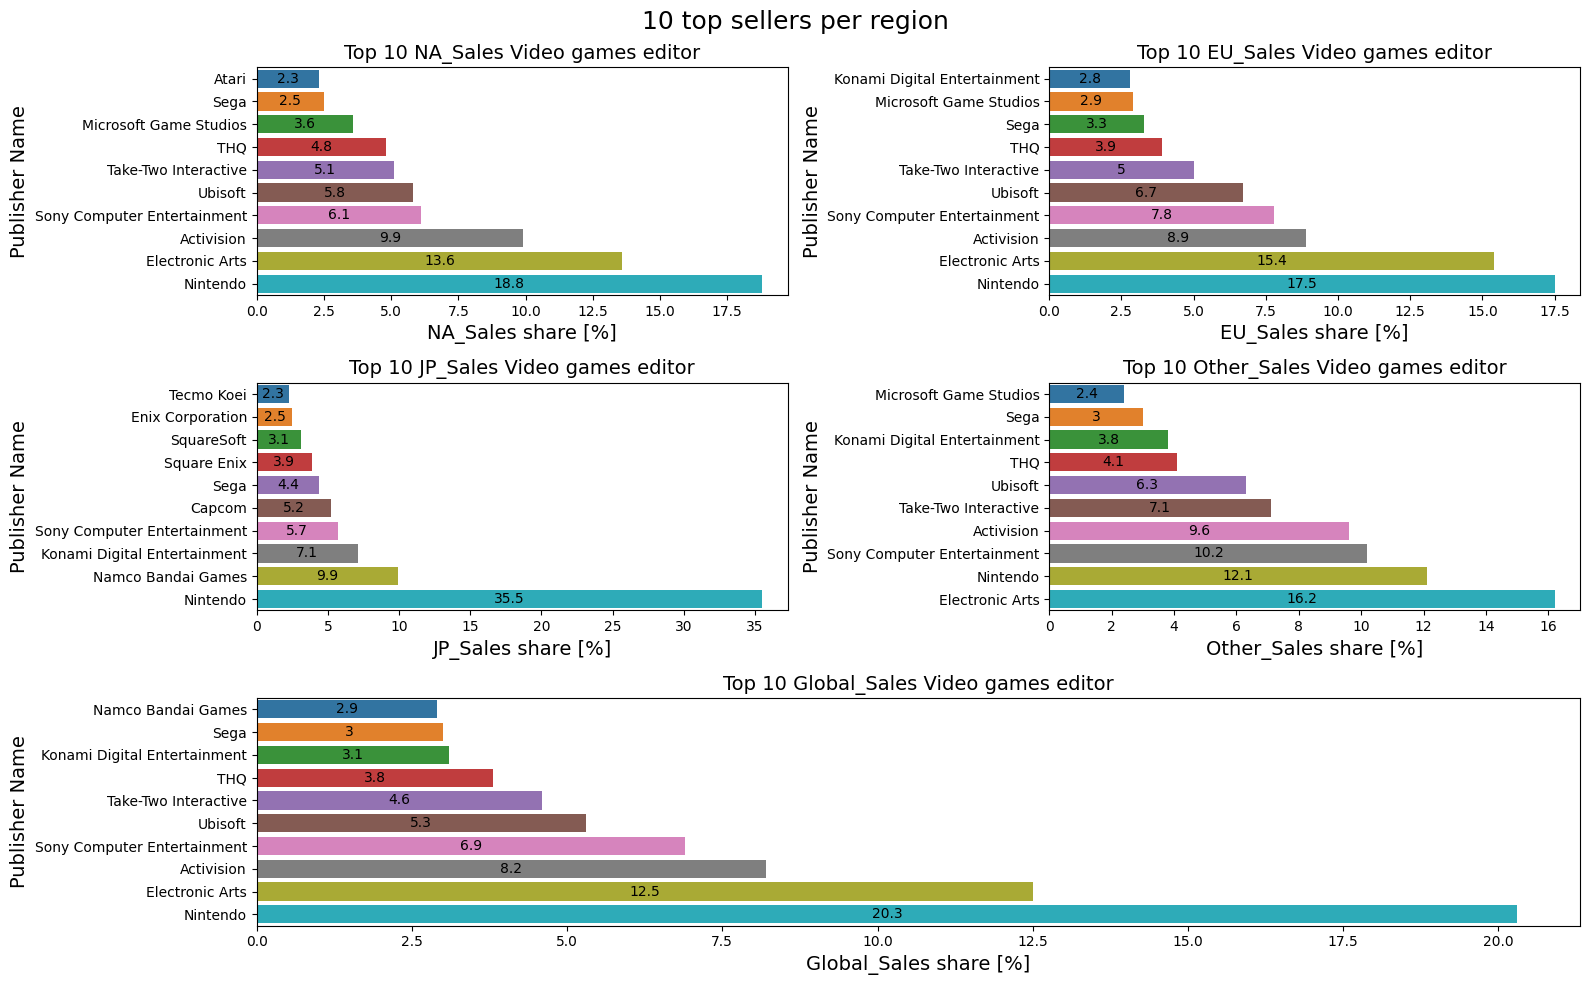

In [22]:
fig = plt.figure(figsize=(16,10))
axes[0] = plt.subplot2grid(shape=(3,2), loc=(0,0), colspan=1)    
axes[1] = plt.subplot2grid(shape=(3,2), loc=(0,1), colspan=1)
axes[2] = plt.subplot2grid(shape=(3,2), loc=(1,0), colspan=1)
axes[3] = plt.subplot2grid(shape=(3,2), loc=(1,1), colspan=1)
axes[4] = plt.subplot2grid(shape=(3,2), loc=(2,0), colspan=2)

# axes = axes.ravel() #Required for array typing ???

for index, region in enumerate(sales_regions):
    data_sales_sort = publishers_df.sort_values(by=region, ascending=True)
    sns.barplot(x=data_sales_sort[region].tail(10),y=data_sales_sort['Publisher'].tail(10), ax=axes[index])
    axes[index].set_title(f'Top 10 {region} Video games editor', fontsize = 14)
    axes[index].set_xlabel(f'{region} share [%]', fontsize = 14)
    axes[index].set_ylabel('Publisher Name', fontsize = 14)
    axes[index].bar_label(axes[index].containers[0], label_type='center', fontsize = 10)

plt.suptitle('10 top sellers per region', fontsize = 18)
plt.tight_layout()
plt.show()

When we compare each publisher total sales since 1986 to the total number of video games sales, we can see that Nintendo did a fifth of all the video games sales done in the world ! In other word, one out of five game ever sold in the world was edited by Nintendo. In Japan they even did 35% of all sales. This can maybe be explained by the amount of games edited and also by the popularity of the brand as well as the wide range of console they produce, from the Wii to the portable DS.
Nintendo also hire subcontracting companies to develop games under its label. For example Game Freak develops Pokemon for Nintendo.

EA is second with 12% of the global sales. We can see that EA sell more in Europe and North America, it is even the first editor in other regions of the world while it is not even in the top 10 in Japan.

Activision, the editor of Call of Duty, is also a big seller being top 3 in Europe and North America and top 4 in "Other". Though it is again not in the Japanese Top 10.

## What are the video games sales per platforms ?

Is the reason of Nintendo success the fact that they are producing more consoles ? Or are they dominating because of one platform in particular ?

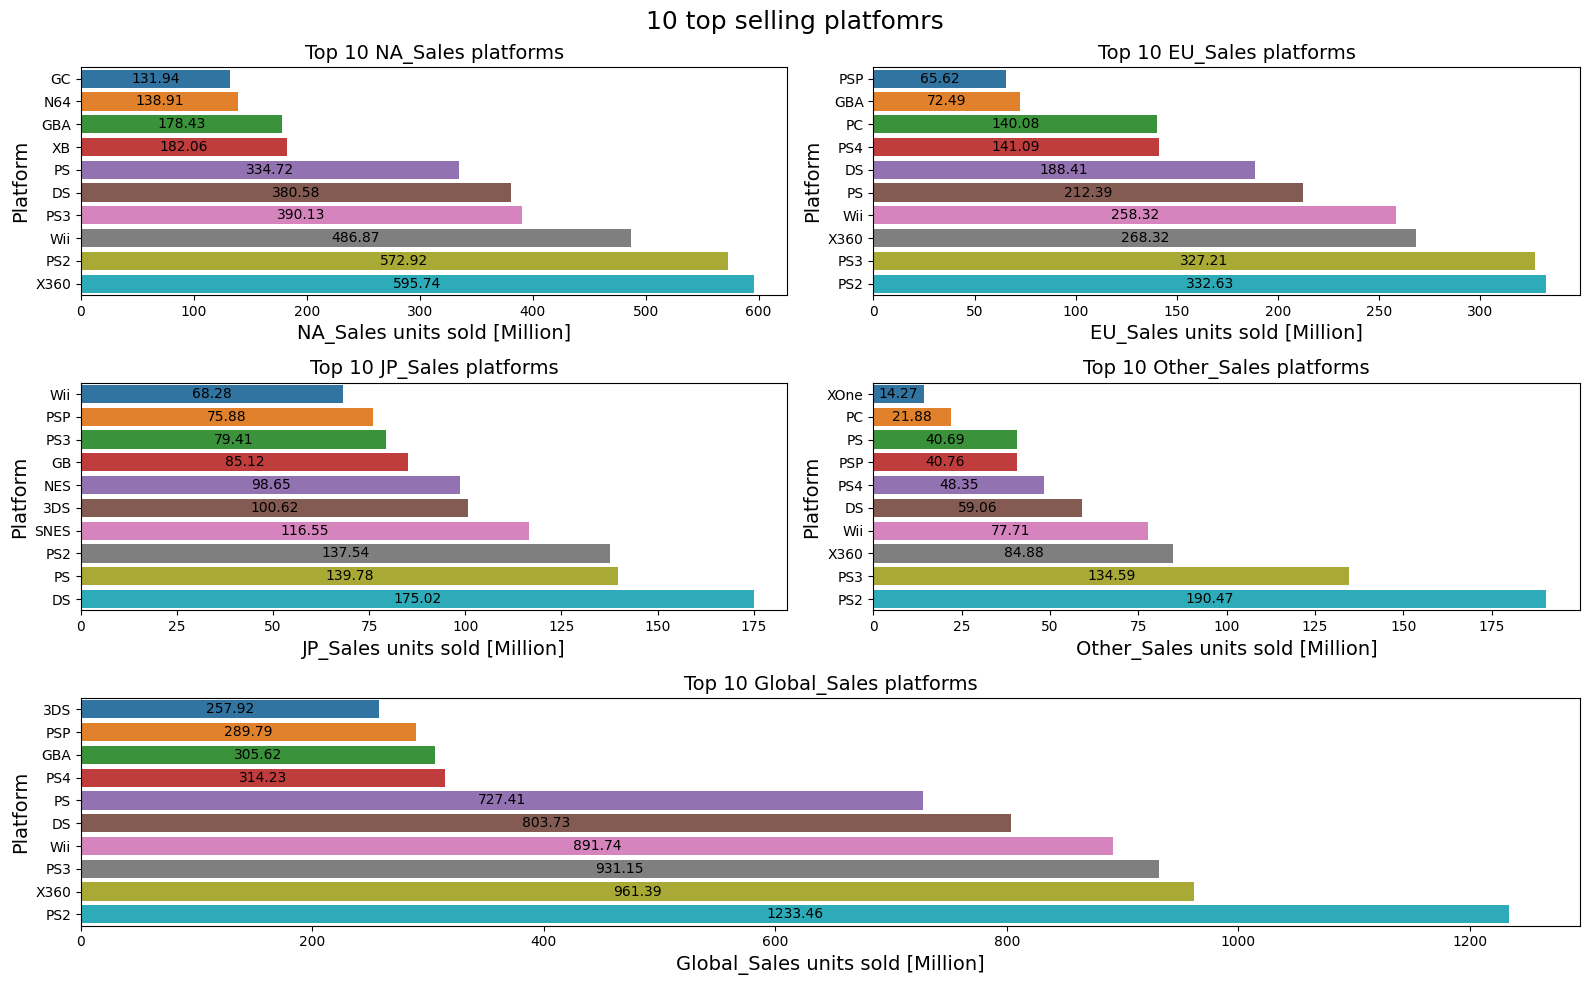

In [26]:
#Plot all time

platform_df = pd.DataFrame()
platforms = data_clear['Platform'].unique()
for region in sales_regions:
    platform_df[region]=data_clear.groupby('Platform')[region].sum()

platform_df['Platform'] = np.sort(platforms)

fig = plt.figure(figsize=(16,10))
axes[0] = plt.subplot2grid(shape=(3,2), loc=(0,0), colspan=1)    
axes[1] = plt.subplot2grid(shape=(3,2), loc=(0,1), colspan=1)
axes[2] = plt.subplot2grid(shape=(3,2), loc=(1,0), colspan=1)
axes[3] = plt.subplot2grid(shape=(3,2), loc=(1,1), colspan=1)
axes[4] = plt.subplot2grid(shape=(3,2), loc=(2,0), colspan=2)

# axes = axes.ravel() #Required for array typing ???

for index, region in enumerate(sales_regions):
    data_sales_sort = platform_df.sort_values(by=region, ascending=True)
    sns.barplot(x=data_sales_sort[region].tail(10),y=data_sales_sort['Platform'].tail(10), ax=axes[index])
    axes[index].set_title(f'Top 10 {region} platforms', fontsize = 14)
    axes[index].set_xlabel(f'{region} units sold [Million]', fontsize = 14)
    axes[index].set_ylabel('Platform', fontsize = 14)
    axes[index].bar_label(axes[index].containers[0], label_type='center', fontsize = 10)

plt.suptitle('10 top selling platfomrs', fontsize = 18)
plt.tight_layout()


The Playstation 2 is the platform that sold the most video games around the world, especially in Europe. One may note that in North America, the XBOX 360 is a few million of units better than the PS2. This can be explained by the fact that the XBOX 360 is manufactured by Microsoft, an American Company.

In Japan, Nintendo remains king, with the portable platform DS.

Even though Nintendo is dominating the global sales we can see that it's main consoles are not selling more than the Playstations or Xbox. This could be explain by the amount of games edited by Nintendo (716 known licensed games). This could also be explained by the amount of different editor participating to the Playstations game sales. There is most likely more editors developing for PS2 for example than there is editor developing for the Wii. Which means that most of the games sold on the Nintendo platforms were probably Nintendo games.

Fun fact, Wii Sports with its 80 millions units sold, represent almost 10% of all games sold on the Wii.

## What is the most dominating platform over the years ?

The previous section showed that the Playstation 2 dominated the market. Does that mean that it destroyed the competition during its time ? Or is it because global sales amount changed over the years ?

In [41]:
#Plot per year
#Create new dataframe with the platforms we want to consider
platform_df = pd.DataFrame()
platform_df = data_clear[(data_clear['Platform']=='PS')|(data_clear['Platform']=='PS2')|(data_clear['Platform']=='PS3')|(data_clear['Platform']=='PS4')
                         |(data_clear['Platform']=='XB')|(data_clear['Platform']=='X360')|(data_clear['Platform']=='XOne')|(data_clear['Platform']=='Wii')
                         |(data_clear['Platform']=='WiiU')|(data_clear['Platform']=='DS')]


platform_df.head(10)

platform_df_group = platform_df.groupby(['Year_of_Release','Platform'])['Global_Sales'].sum()
platform_df_group.head(10)



Year_of_Release  Platform
1985.0           DS            0.02
1994.0           PS            6.02
1995.0           PS           35.92
1996.0           PS           94.68
1997.0           PS          136.08
1998.0           PS          169.58
1999.0           PS          144.57
2000.0           PS           96.30
                 PS2          39.11
                 XB            0.99
Name: Global_Sales, dtype: float64

A selection of the main best selling consoles was done for the following analysis.

<AxesSubplot:xlabel='Year_of_Release'>

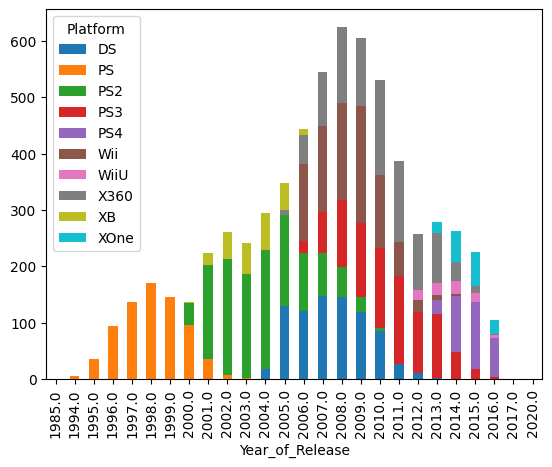

In [42]:
#Make stack bar plot
platform_df_group.unstack().plot(kind='bar', stacked = True)


In the 90s the playstation dominates. Then in the 2000s the playstation 2 is destroying the young competition that is the Microsoft Xbox. With the next generation of platform and the Xbox360, Mixrosoft strikes back and tjaes more market than the PS3. But Nintendo, with the Wii and the DS takes almost half of the market.
One generation afterthe Playstation 4 seems to be destroying the competiton once again. And the WiiU is struggling to get market share.
Fun fact, it seems that the year of the release of the PS4 and the XOne, their market share was similar. Though with time, PS4 started taking more and more of the market.

We can also see that between 2005 and 2011 the amount of games sold was way higher than in 2016. Is it because of a migration to other type of platforms ? We can think about mobile phone gaming that is the biggest gaming industry currently. But also we can think about the emergance of free to play PC games with longer life span, like League of Legends or Fortnite.

Even games like Counter-Strike Global Offensive have been around for many years and only requires a one time purchase. All that making business models like Activision's or EA of releasing the same game every year less interesting for gamers.